In [1]:
"""
Script to generate embeddings for images (for catalog images) and store embeddings to Qdrant database.
@File    : embeddings.py
@Date    : 2025-03-04
@Author  : Nandini Bohra
@Contact : nbohra@ucsd.edu

@References : https://www.youtube.com/watch?v=MlRkBvOCfTY
"""

'\nScript to generate embeddings for images (for catalog images) and store embeddings to Qdrant database.\n@File    : embeddings.py\n@Date    : 2025-03-04\n@Author  : Nandini Bohra\n@Contact : nbohra@ucsd.edu\n\n@References : https://www.youtube.com/watch?v=MlRkBvOCfTY\n'

In [2]:
# Creating list of all catalog images in local directory

import os

base_directory = "/Users/nandinibohra/Desktop/VSCodeFiles/ImageRecommendation_ProductMatching/Product_Catalog/all_product_images/sample_images"
all_img_files = os.listdir(base_directory)
print(all_img_files)


['sample_48.jpg', 'sample_49.jpg', 'sample_05.jpg', 'sample_11.jpg', 'sample_39.jpg', 'sample_38.jpg', 'sample_10.jpg', 'sample_04.jpg', 'sample_12.jpg', 'sample_06.jpg', 'sample_07.jpg', 'sample_13.jpg', 'sample_17.jpg', 'sample_03.jpg', 'sample_02.jpg', 'sample_16.jpg', 'sample_28.jpg', 'sample_00.jpg', 'sample_14.jpg', 'sample_15.jpg', 'sample_01.jpg', 'sample_29.jpg', 'sample_24.jpg', 'sample_30.jpg', 'sample_18.jpg', 'sample_19.jpg', 'sample_31.jpg', 'sample_25.jpg', 'sample_33.jpg', 'sample_27.jpg', 'sample_26.jpg', 'sample_32.jpg', 'sample_36.jpg', 'sample_22.jpg', 'sample_23.jpg', 'sample_37.jpg', 'sample_09.jpg', 'sample_21.jpg', 'sample_35.jpg', 'sample_34.jpg', 'sample_20.jpg', 'sample_08.jpg', 'sample_47.jpg', 'sample_46.jpg', 'sample_44.jpg', 'sample_45.jpg', 'sample_41.jpg', 'sample_40.jpg', 'sample_42.jpg', 'sample_43.jpg']


In [3]:
# Creating full paths of all catalog images in local directory

all_img_urls = list(map(lambda x: os.path.join(base_directory, x), all_img_files))
all_img_urls.sort()
all_img_urls[:15]

['/Users/nandinibohra/Desktop/VSCodeFiles/ImageRecommendation_ProductMatching/Product_Catalog/all_product_images/sample_images/sample_00.jpg',
 '/Users/nandinibohra/Desktop/VSCodeFiles/ImageRecommendation_ProductMatching/Product_Catalog/all_product_images/sample_images/sample_01.jpg',
 '/Users/nandinibohra/Desktop/VSCodeFiles/ImageRecommendation_ProductMatching/Product_Catalog/all_product_images/sample_images/sample_02.jpg',
 '/Users/nandinibohra/Desktop/VSCodeFiles/ImageRecommendation_ProductMatching/Product_Catalog/all_product_images/sample_images/sample_03.jpg',
 '/Users/nandinibohra/Desktop/VSCodeFiles/ImageRecommendation_ProductMatching/Product_Catalog/all_product_images/sample_images/sample_04.jpg',
 '/Users/nandinibohra/Desktop/VSCodeFiles/ImageRecommendation_ProductMatching/Product_Catalog/all_product_images/sample_images/sample_05.jpg',
 '/Users/nandinibohra/Desktop/VSCodeFiles/ImageRecommendation_ProductMatching/Product_Catalog/all_product_images/sample_images/sample_06.jpg',

In [5]:
# Creating dataframe of all images and paths in local directory 

from pandas import DataFrame
from PIL import Image

from image_extraction import sample_data

payloads = DataFrame.from_records(
    {"id" : range(0, len(all_img_urls)),
     "image_url": all_img_urls})
payloads["type"] = "samples"
payloads["material"] = payloads["image_url"].map(lambda x: sample_data.get(x, [None, None])[0])
payloads["color"] = payloads["image_url"].map(lambda x: sample_data.get(x, [None, None])[1])

payloads.head()


,id,image_url,type,material,color
0,0,/Users/nandinibohra/Desktop/VSCodeFiles/ImageR...,samples,JUTE,CREAM
1,1,/Users/nandinibohra/Desktop/VSCodeFiles/ImageR...,samples,AURA,ROSE
2,2,/Users/nandinibohra/Desktop/VSCodeFiles/ImageR...,samples,AURA,MINT
3,3,/Users/nandinibohra/Desktop/VSCodeFiles/ImageR...,samples,SURFACE,OFFWHITE
4,4,/Users/nandinibohra/Desktop/VSCodeFiles/ImageR...,samples,SURFACE,COFFEE


In [6]:
# Transforming local images into PIL images

images = list(map(lambda x: Image.open(x), payloads["image_url"]))
images[:5]

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1700x920>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1700x920>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1700x920>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1700x920>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1700x920>]

In [7]:
# Resizing originals to smaller images and converting to base-64 rep if needed to show on front end

from io import BytesIO
import math
import base64

target_width = 256

# Resizing images to target width
# Returns PIL image
def resize_img(url):
    pil_img = Image.open(url)
    img_aspect_ratio = pil_img.width / pil_img.height
    resized_img = pil_img.resize(
        (target_width, math.floor(target_width * img_aspect_ratio))
    )

    return resized_img

# Converting PIL image to base64 string
def img_to_base64(pil_img):
    image_data = BytesIO()
    pil_img.save(image_data, format="JPEG")
    base64_string = base64.b64encode(image_data.getvalue()).decode("utf-8")
    return base64_string

# Saving base64 reps to payloads dataframe
resized_images = list(map(lambda x: resize_img(x), payloads["image_url"])) 
base64_images = list(map(lambda x: img_to_base64(x), resized_images))
payloads["base64"] = base64_images
payloads.head()


,id,image_url,type,material,color,base64
0,0,/Users/nandinibohra/Desktop/VSCodeFiles/ImageR...,samples,JUTE,CREAM,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,1,/Users/nandinibohra/Desktop/VSCodeFiles/ImageR...,samples,AURA,ROSE,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,2,/Users/nandinibohra/Desktop/VSCodeFiles/ImageR...,samples,AURA,MINT,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,3,/Users/nandinibohra/Desktop/VSCodeFiles/ImageR...,samples,SURFACE,OFFWHITE,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,4,/Users/nandinibohra/Desktop/VSCodeFiles/ImageR...,samples,SURFACE,COFFEE,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


In [ ]:
# Trial with Microsoft Resnet-50 model
# https://huggingface.co/microsoft/resnet-50

from transformers import AutoImageProcessor, ResNetForImageClassification

processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")

inputs = processor(
    images, 
    return_tensors="pt", 
    # padding=True
)

outputs = model(**inputs)
embeddings = outputs.logits
embeddings

# Evaluated embeddings... not sure if this is the right fit 
# Researching and trying other models

In [10]:
# Trying DINO V2 model 
# Less for object classification and more for fine details, textures --> suitable for textile catalog
# https://huggingface.co/facebook/dinov2-base

from transformers import AutoImageProcessor, AutoModel
import torch

processor = AutoImageProcessor.from_pretrained('facebook/dinov2-base')
model = AutoModel.from_pretrained('facebook/dinov2-base')

inputs = processor(
    images, 
    return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

hidden_states = outputs.last_hidden_state # Shape: [batch_size=50, num_tokens=1+256, hidden_size=768]

# Removing CLS Token and taking average of all patch embeddings
# This is because CLS token is used for classification, semantics and not for image embeddings
# Proceeding with average of all patch embeddings to retain more fine-grained details of image

all_patch_embedding = hidden_states[:, 1:, :]
print(all_patch_embedding.shape)

avg_patch_embeddings = torch.mean(all_patch_embedding, dim=1)
print(avg_patch_embeddings.shape)

avg_patch_embeddings


/Users/nandinibohra/Desktop/VSCodeFiles/ImageRecommendation_ProductMatching/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


torch.Size([50, 256, 768])
torch.Size([50, 768])


tensor([[ 2.0762, -0.6573, -1.2523,  ..., -2.4574,  2.6448,  1.5191],
        [-0.4449, -2.0491,  0.1821,  ..., -1.9458,  0.8712,  0.5811],
        [ 0.4392, -1.2278,  0.5826,  ..., -2.7191,  0.5528,  0.1768],
        ...,
        [-0.9288,  0.0287,  0.2134,  ...,  0.1613,  1.1370, -0.3278],
        [-0.9295, -1.0524,  0.2013,  ..., -1.2167,  1.9730,  0.4091],
        [ 1.3811,  0.6739, -1.6661,  ..., -2.4400,  2.4154,  1.5018]])

In [11]:
embedding_len = len(avg_patch_embeddings[0])
embedding_len

768

In [24]:
# Now working with CLIP instead to implement multimodal similarity search

from transformers import CLIPProcessor, CLIPModel
import torch

model_id = "openai/clip-vit-base-patch32"
processor = CLIPProcessor.from_pretrained(model_id)
model = CLIPModel.from_pretrained(model_id)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

payloads['info'] = payloads['material'] + " " + payloads['color']
tokens = processor(
    text=payloads['info'].tolist(),
    padding=True,
    return_tensors='pt'
).to(device)
tokens.keys()

dict_keys(['input_ids', 'attention_mask'])

In [40]:
# Getting text embeddings from CLIP

with torch.no_grad():
    text_emb = model.get_text_features(**tokens)

print(text_emb.shape)
print(text_emb.min(), text_emb.max())


torch.Size([50, 512])
tensor(-3.1601) tensor(7.0389)


In [41]:
import numpy as np

# detach text emb from graph, move to CPU, and convert to numpy array
text_emb = text_emb.detach().cpu().numpy()

# calculate value to normalize each vector by
norm_factor = np.linalg.norm(text_emb, axis=1)
norm_factor.shape

(50,)

In [42]:
# Getting image embeddings from CLIP
img_inputs = processor(
    text=None,
    images=images,
    return_tensors='pt'
)['pixel_values'].to(device)
img_inputs.shape

torch.Size([50, 3, 224, 224])

In [43]:
img_emb = model.get_image_features(img_inputs)
print(img_emb.shape)
print(img_emb.min(), img_emb.max())

# NORMALIZE
# detach text emb from graph, move to CPU, and convert to numpy array
img_emb = img_emb.detach().cpu().numpy()

img_emb = img_emb.T / np.linalg.norm(img_emb, axis=1)
# transpose back to (21, 512)
img_emb = img_emb.T
print(img_emb.shape)
print(img_emb.min(), img_emb.max())

torch.Size([50, 512])
tensor(-9.4213, grad_fn=<MinBackward1>) tensor(3.1204, grad_fn=<MaxBackward1>)
(50, 512)
-0.8036282 0.28607258


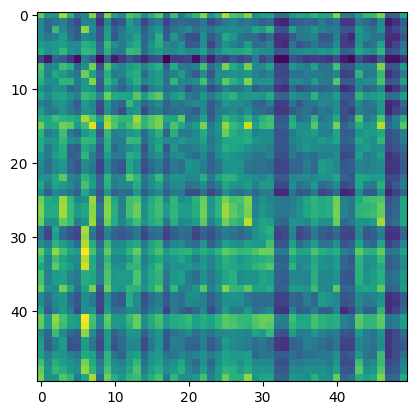

In [46]:
from numpy.linalg import norm

cos_sim = np.dot(text_emb, img_emb.T) / (
    norm(text_emb, axis=1) * norm(img_emb, axis=1)
)
cos_sim.shape

import matplotlib.pyplot as plt

plt.imshow(cos_sim)
plt.show()

In [13]:
# Loading Qdrant database access tokens from .env file

from dotenv import load_dotenv
load_dotenv()

True

In [18]:
# Initializing Qdrant client object

from qdrant_client import QdrantClient

qclient = QdrantClient(
    url= os.getenv("QDRANT_DB_URL"),
    api_key= os.getenv("QDRANT_API_KEY")
)
qclient

In [19]:
# Creating collection in Qdrant database 

from qdrant_client.models import Distance, VectorParams

collection_name = "sample_images_2"
collection = qclient.recreate_collection(
    collection_name=collection_name,
    vectors_config=VectorParams(
        size=embedding_len,

        # Previously tried DOT distance, but cosine distance is more suitable for image embeddings
        distance=Distance.COSINE
    )
)
collection

/var/folders/p4/h22vp3dd135f5npjdy_vlh1c0000gn/T/ipykernel_76866/3401461942.py:6: DeprecationWarning: `recreate_collection` method is deprecated and will be removed in the future. Use `collection_exists` to check collection existence and `create_collection` instead.
  collection = qclient.recreate_collection(


True

In [20]:
# JSONifying the payloads dataframe to format metadata for each point

payload_dicts = payloads.to_dict(orient="records")
payload_dicts[:1]

[{'id': 0,
  'image_url': '/Users/nandinibohra/Desktop/VSCodeFiles/ImageRecommendation_ProductMatching/Product_Catalog/all_product_images/sample_images/sample_00.jpg',
  'type': 'samples',
  'material': 'JUTE',
  'color': 'CREAM',
  'base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHZAQADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0

In [21]:
# Creating records of payloads to load into Qdrant

from qdrant_client import models

records = [
    models.Record(
        id=idx,
        payload=payload_dicts[idx],
        vector=avg_patch_embeddings[idx]
    )
    for idx, _ in enumerate(payload_dicts)
]

In [22]:
# Sending records to Qdrant database

qclient.upload_records(
    collection_name=collection_name,
    records=records
)

/var/folders/p4/h22vp3dd135f5npjdy_vlh1c0000gn/T/ipykernel_76866/2914591607.py:3: DeprecationWarning: `upload_records` is deprecated, use `upload_points` instead
  qclient.upload_records(


In [ ]:
# from qdrant_client import QdrantClient
# from qdrant_client.models import Distance, VectorParams
# from qdrant_client.models import PointStruct



# client = QdrantClient(url="http://localhost:6333")

# # client.create_collection(
# #     collection_name="test_collection",
# #     vectors_config=VectorParams(size=4, distance=Distance.DOT),
# # )

# # operation_info = client.upsert(
# #     collection_name="test_collection",
# #     wait=True,
# #     points=[
# #         PointStruct(id=1, vector=[0.05, 0.61, 0.76, 0.74], payload={"city": "Berlin"}),
# #         PointStruct(id=2, vector=[0.19, 0.81, 0.75, 0.11], payload={"city": "London"}),
# #         PointStruct(id=3, vector=[0.36, 0.55, 0.47, 0.94], payload={"city": "Moscow"}),
# #         PointStruct(id=4, vector=[0.18, 0.01, 0.85, 0.80], payload={"city": "New York"}),
# #         PointStruct(id=5, vector=[0.24, 0.18, 0.22, 0.44], payload={"city": "Beijing"}),
# #         PointStruct(id=6, vector=[0.35, 0.08, 0.11, 0.44], payload={"city": "Mumbai"}),
# #     ],
# # )

# # print(operation_info)

# # search_result = client.query_points(
# #     collection_name="test_collection",
# #     query=[0.2, 0.1, 0.9, 0.7],
# #     with_payload=False,
# #     limit=3
# # ).points

# # print(search_result)

# client.delete_collection(collection_name="test_collection")
# print(f"Collection 'test_collection' deleted.")
